#Decision Tree without sklearn

##Importing Libraries and data


In [18]:
import pandas as pd
import numpy as np
import math
from itertools import combinations
import statistics as st

## Secundary Functions 

### def sum_squared_residuals


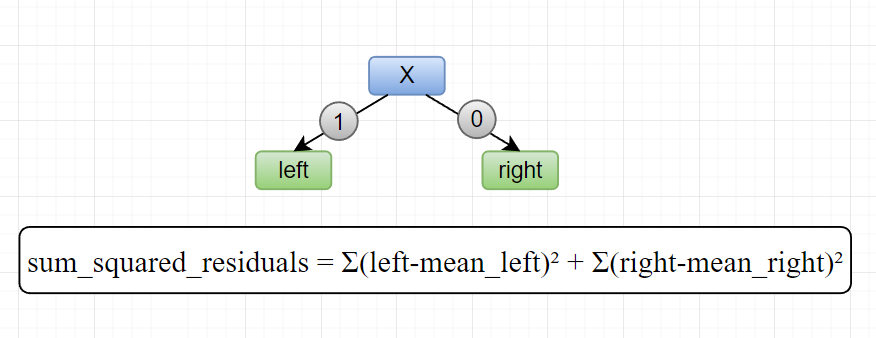

In [19]:
# caculating sum_squared_residuals
def sum_squared_residuals(left, right):

  if (len(left) == 0) or (len(right) == 0):
    return "empty left or right"
  mean_left = st.mean(left)
  mean_right = st.mean(right)

  total_squared_residuals = 0
  for x in left:
    total_squared_residuals += (x-mean_left)**2
  for x in right:
    total_squared_residuals += (x-mean_right)**2

  return total_squared_residuals

### For Binary independent variables 

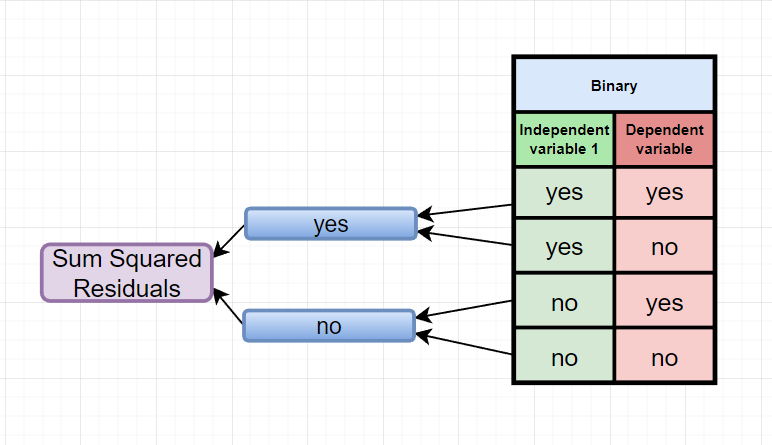

In [20]:
# calculating impurity
def residuals_binary(X,y,index_to_use):

  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()

  left = []
  right = []
  index = 0
  index_left = []
  index_right = []
  
 # adding to variables
  for i in range(len(X)):
    if i in index_to_use:
      if X[i]==uniques_values_list[0]:
        right.append(y_temp[i]) 
        index_right.append(index)

      if len(uniques_values_list) >=2:
        if X[i]==uniques_values_list[1]:
          left.append(y_temp[i]) 
          index_left.append(index)
        
    index +=1
  if len(uniques_values_list) ==1:
    uniques_values_list[1]=None

  sum_residuals = sum_squared_residuals(left,right)

  if sum_residuals == "empty left or right":
    return "Do not choose this residuals_dict, empty left or right"

  return [sum_residuals,(uniques_values_list[1],uniques_values_list[0]),(index_left,index_right),(left,right)]


### For Ordinal as int independent variables with only sucessor eg. 0,1,2,3,4

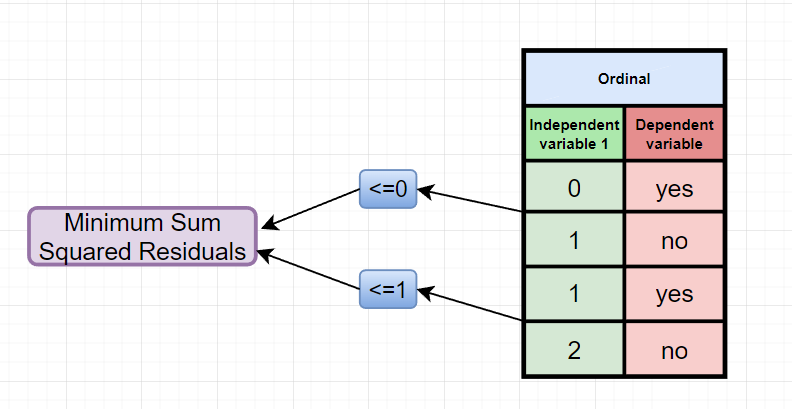

In [21]:
def residuals_ordinal(X,y,index_to_use):
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort() 


  residuals_dict = {}

  for x in range(len(uniques_values_list[:-1])):
    left = []
    right = []
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if X[i] > uniques_values_list[x]:
          right.append(y_temp[i]) 
          index_right.append(index)
        elif X[i]<=uniques_values_list[x]:
          left.append(y_temp[i]) 
          index_left.append(index)
      index +=1
    residuals_dict[x] = [left,right,['<=', uniques_values_list[x]],['>',uniques_values_list[x]],index_left,index_right]


  # selecting the minimum sum_squared_residuals
  key_selected = "None key selected"
  for k,v in residuals_dict.items(): 
    temp_residuals = sum_squared_residuals(v[0], v[1])
    if temp_residuals !="empty left or right":
      if (key_selected == "None key selected"):
        key_selected = k
        minimum_residuals = temp_residuals
      elif (temp_residuals<minimum_residuals):
        key_selected = k
        minimum_residuals = temp_residuals
  if key_selected == "None key selected":
    return "Do not choose this residuals_dict, empty left or right"

  return [minimum_residuals, (residuals_dict[key_selected][2],residuals_dict[key_selected][3]),(residuals_dict[key_selected][4],residuals_dict[key_selected][5]),
          (residuals_dict[key_selected][0],residuals_dict[key_selected][1])]

### For Discrete independent variables

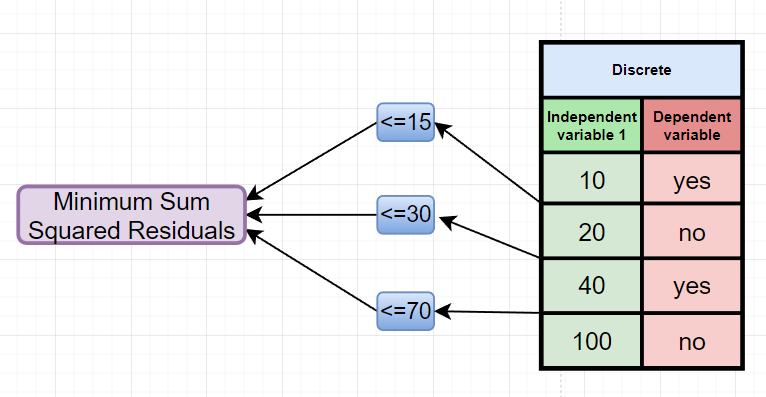

In [22]:
#same as continuous
def residuals_discrete(X,y,index_to_use):
  return residuals_continuous(X,y,index_to_use)


###For Categorical (Nominal or Ordinal as string) independent variables

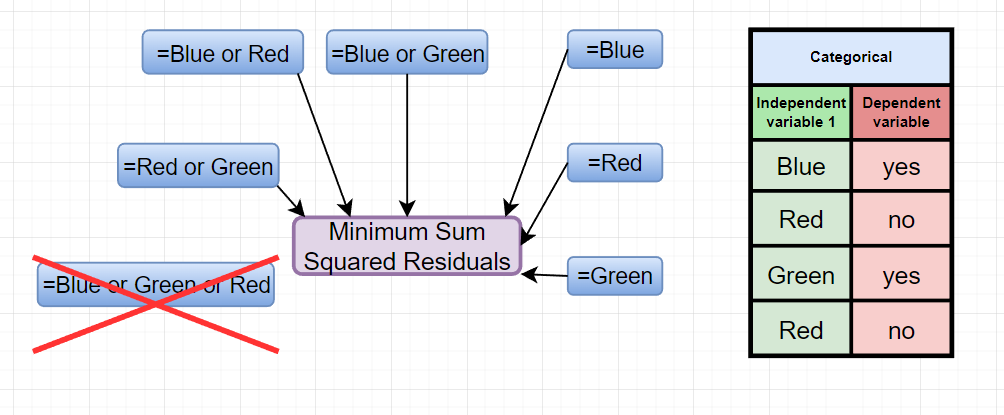

In [23]:
def residuals_categorical(X,y,index_to_use):
  
  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()

  combination_condition_list=[]
  for i in range(len(uniques_values_list)):
    if i != 0:
      comb = list(combinations(uniques_values_list,i))
      for x in comb:
        combination_condition_list.append(x)

  residuals_dict = {}
  for x in range(len(combination_condition_list)):
    left = []
    right = []
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if X[i] not in combination_condition_list[x]:
          right.append(y_temp[i]) 
          index_right.append(index)
        elif X[i]in combination_condition_list[x]:
          left.append(y_temp[i]) 
          index_left.append(index)
      index +=1
    residuals_dict[x] = [left,right, ['in', combination_condition_list[x]],['not in', combination_condition_list[x]],index_left,index_right]

  # selecting the minimum sum_squared_residuals
  key_selected = "None key selected"
  for k,v in residuals_dict.items(): 
    temp_residuals = sum_squared_residuals(v[0], v[1])
    if temp_residuals !="empty left or right":
      if (key_selected == "None key selected"):
        key_selected = k
        minimum_residuals = temp_residuals
      elif (temp_residuals<minimum_residuals):
        key_selected = k
        minimum_residuals = temp_residuals
  if key_selected == "None key selected":
    return "Do not choose this residuals_dict, empty left or right"

  return [minimum_residuals, (residuals_dict[key_selected][2],residuals_dict[key_selected][3]),(residuals_dict[key_selected][4],residuals_dict[key_selected][5]),
          (residuals_dict[key_selected][0],residuals_dict[key_selected][1])]


###For Continuous independent variables

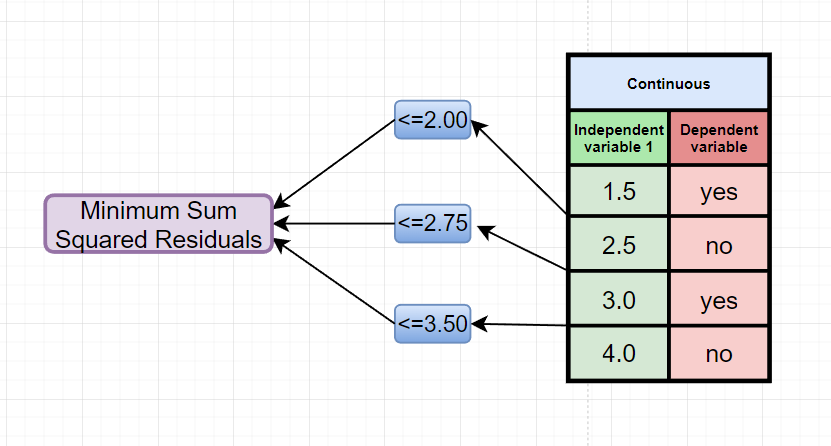

In [24]:
#same as discrete
def residuals_continuous(X,y,index_to_use):

  X_temp = X.copy()
  y_temp = y.copy()
  uniques_values_list = set(X_temp)
  uniques_values_list = list(uniques_values_list)
  uniques_values_list.sort()


  middle_condition_list=[]
  for i in range(len(uniques_values_list[:-1])):
    middle_condition_list.append( (uniques_values_list[i] +uniques_values_list[i+1])/2)

  residuals_dict = {}
  for x in range(len(middle_condition_list)):
    left = []
    right = []
    index = 0
    index_left = []
    index_right = []
    # adding to variables
    for i in range(len(X)):
      if i in index_to_use:
        if X[i] > middle_condition_list[x]:
          right.append(y_temp[i]) 
          index_right.append(index)
        elif X[i]<=middle_condition_list[x]:
          left.append(y_temp[i]) 
          index_left.append(index)
      index +=1
    residuals_dict[x] = [left,right, ['<=',middle_condition_list[x]],['>',middle_condition_list[x]],index_left,index_right]
  
  # selecting the minimum sum_squared_residuals
  key_selected = "None key selected"
  for k,v in residuals_dict.items(): 
    temp_residuals = sum_squared_residuals(v[0], v[1])
    if temp_residuals !="empty left or right":
      if (key_selected == "None key selected"):
        key_selected = k
        minimum_residuals = temp_residuals
      elif (temp_residuals<minimum_residuals):
        key_selected = k
        minimum_residuals = temp_residuals       
  if key_selected == "None key selected":
    return "Do not choose this residuals_dict, empty left or right"

  return [minimum_residuals, (residuals_dict[key_selected][2],residuals_dict[key_selected][3]),(residuals_dict[key_selected][4],residuals_dict[key_selected][5]),
          (residuals_dict[key_selected][0],residuals_dict[key_selected][1])]


## Main Functions

### def func_tree

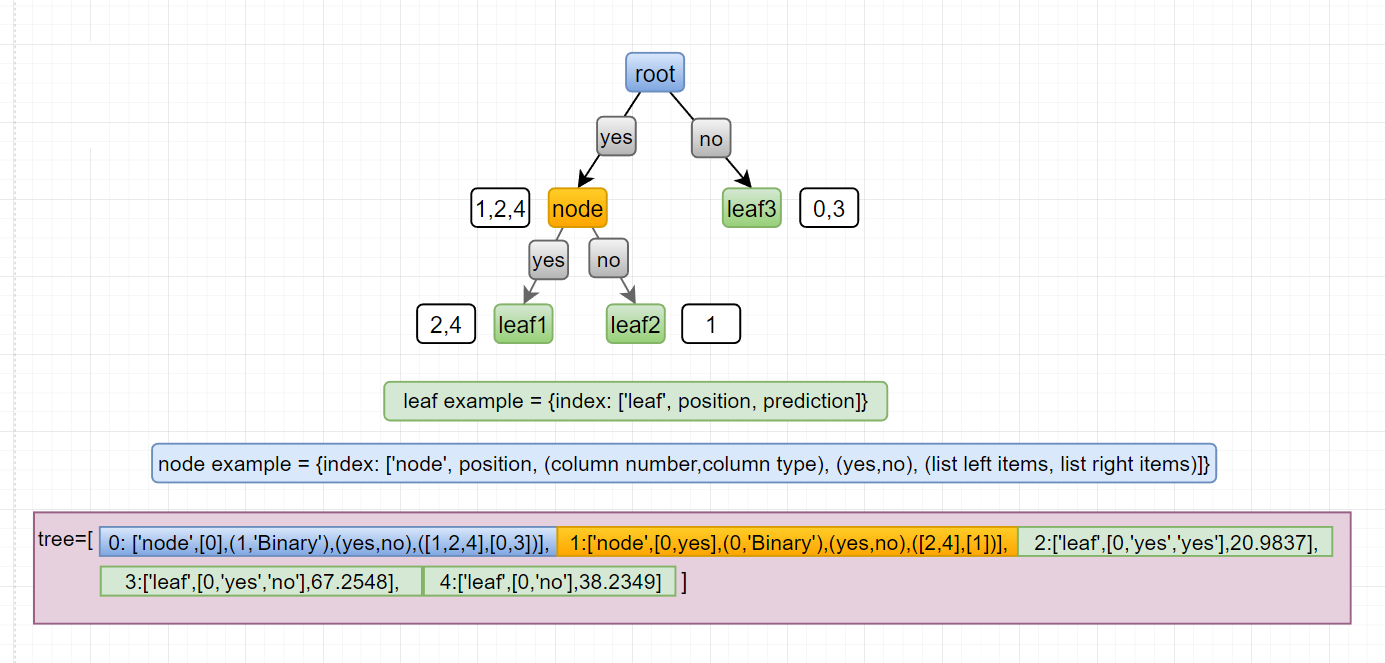

In [25]:
def func_tree(tree,type_X_y_dict,position,index_to_use,max_depth,min_sample):

  #copying for not change with append
  type_X_y_dict_to_use = type_X_y_dict.copy()
  index_to_use_temp = index_to_use.copy()

  residuals_dict = {}  # key = column number : values = [minimum_residuals,(left_branch_condition,right_branch_condition),(index_left,index_right) ,(left, right)]
  column_type = []
  for k,v in type_X_y_dict_to_use.items():
    
    if v[0] == 'Binary':
      residuals_dict[k] = residuals_binary(v[1],v[2],index_to_use)
      column_type.append('Binary')
    elif v[0] == 'Ordinal':
      residuals_dict[k] = residuals_ordinal(v[1],v[2],index_to_use)
      column_type.append('Ordinal')
    elif v[0] == 'Discrete':
      residuals_dict[k] = residuals_discrete(v[1],v[2],index_to_use)
      column_type.append('Discrete')
    elif v[0] == 'Categorical':
      residuals_dict[k] = residuals_categorical(v[1],v[2],index_to_use)
      column_type.append('Categorical')
    elif v[0] == 'Continuous':
      residuals_dict[k] = residuals_continuous(v[1],v[2],index_to_use)
      column_type.append('Continuous')
    else:
      column_type = 'Error'
      print('Error: column_type not found')

  # searching for minimum sum_squared_residuals
  column_type_temp = column_type.copy()
 
  column_min = "None column_min selected"
  for k,v in residuals_dict.items(): 
    
    if type(v) == str:
      temp_residuals = v
    else:
      temp_residuals = v[0]

    if temp_residuals != "Do not choose this residuals_dict, empty left or right":
      if (column_min == "None column_min selected"):
        column_min = k
        minimum_residuals = temp_residuals
      elif (temp_residuals<minimum_residuals):
        column_min = k
        minimum_residuals = temp_residuals

  if column_min == "None column_min selected":
    instance_position0 = position.copy()
    y_temp = type_X_y_dict_to_use[0][2]
    sum = []
    for i in range(len(y_temp)):
      if i in index_to_use:
        sum.append(y_temp[i])
    size = len(tree)
    tree[size] = ['leaf',instance_position0 ,st.mean(sum)]
    return None

  independent_variable = type_X_y_dict[0][2].copy()
  residuals_dict_temp = residuals_dict.copy()
  gini_impurity = residuals_dict_temp[column_min][0]
  left_branch_condition, right_branch_condition = residuals_dict_temp[column_min][1][0],residuals_dict_temp[column_min][1][1]
  left_branch_array, right_branch_array = residuals_dict_temp[column_min][2][0],residuals_dict_temp[column_min][2][1]
  left,right = residuals_dict_temp[column_min][3][0],residuals_dict_temp[column_min][3][1]
  
  instance_position0 = position.copy()
  instance_position1 = position.copy()
  instance_position2 = position.copy()

  size = len(tree)
  tree[size] = ['node',instance_position0,(column_min,column_type_temp[column_min]),(left_branch_condition,right_branch_condition),(left_branch_array,right_branch_array)]
  size = len(tree)

  left_side_leaf_condition = ( len(left_branch_array) <= min_sample) or (len(instance_position1) >= max_depth)  or (len(left_branch_array)==0) 
  right_side_leaf_condition =( len(right_branch_array) <= min_sample) or (len(instance_position2) >= max_depth ) or (len(right_branch_array)==0)
  
  y_temp = independent_variable.copy()
  uniques_values_list_y = set(y_temp)
  uniques_values_list_y = list(uniques_values_list_y)
  uniques_values_list_y.sort()

  # left side
  if left_side_leaf_condition:
    #left leaf
    size = len(tree)
    instance_position1.append(left_branch_condition)
   
    if len(left_branch_array) !=0:
      tree[size] = ['leaf',instance_position1 ,st.mean(left)]
    else:
      tree[size] = ['leaf',instance_position1 ,0]
      print( 'ERROR len(left_branch_array) == 0')

  else:
    # left node
    instance_position1.append(left_branch_condition)
    func_tree(tree,type_X_y_dict,instance_position1,index_to_use = left_branch_array,max_depth=max_depth,min_sample=min_sample) 
  
  # right side
  if right_side_leaf_condition:

    # right leaf
    size = len(tree)
    instance_position2.append(right_branch_condition)

    if len(right_branch_array) !=0:
      tree[size] = ['leaf',instance_position2 ,st.mean(right)]
    else:
      tree[size] = ['leaf',instance_position2 ,0]
      print( 'ERROR len(right_branch_array) == 0')
   
  else:
    # right node
    instance_position2.append(right_branch_condition)
    func_tree(tree,type_X_y_dict,instance_position2,index_to_use =right_branch_array,max_depth=max_depth,min_sample=min_sample) 



### def DecisionTreeClassification

In [26]:
def DecisionTreeClassification(X,y,max_depth=20,min_sample=3):
 
  # if data in numpy format, convert for normal format
  if type (X)== np.ndarray:
    X = np.ndarray.tolist(X)

  type_X_y_dict = {} # key = column number, values = [type,X,y]
  
  #1° time defining the type of column
  for col in range(len(X[0])):
    
    # checking list type
    y_temp = list(y)

    X_temp = []
    for x in range(len(X)):
      X_temp.append(X[x][col])

    temp_list_int = [ type(x) == int for x in X_temp]
    temp_list_str = [ type(x) == str for x in X_temp]
    temp_list_float_or_int = [ (type(x)==float or type(x)==int) for x in X_temp]

    uniques_values = set(X_temp)
    uniques_values_sorted = sorted(uniques_values)
    # checking for ordinal
    if all(temp_list_int):
      is_all_sucessor = []
      for x in range(len(uniques_values_sorted[:-1])):
          is_all_sucessor.append(uniques_values_sorted[x+1]-uniques_values_sorted[x]==1)

    # if Binary
    if len(uniques_values_sorted) ==2 or len(uniques_values_sorted) ==1: 
      type_X_y_dict[col] = ['Binary',X_temp,y_temp]
    # if Ordinal
    elif all(temp_list_int) and all(is_all_sucessor):
      type_X_y_dict[col] = ['Ordinal',X_temp,y_temp]
    # if Discrete
    elif all(temp_list_int) :
      type_X_y_dict[col] = ['Discrete',X_temp,y_temp]
    # if Categorical
    elif all(temp_list_str):
      type_X_y_dict[col] = ['Categorical',X_temp,y_temp]
    # if Continuous
    elif all(temp_list_float_or_int ):
      type_X_y_dict[col] = ['Continuous',X_temp,y_temp]
    # error
    else:
      print('Error: column number:', col , ' does not have uniform data')

  # 2° creating the tree

  tree = {}
  array_index_to_use=[]
 
  for x in range(len(X)):
    array_index_to_use.append(x)
  func_tree(tree,type_X_y_dict,position=[0],index_to_use=array_index_to_use ,max_depth = max_depth,min_sample=min_sample) 

  return tree


### def predict

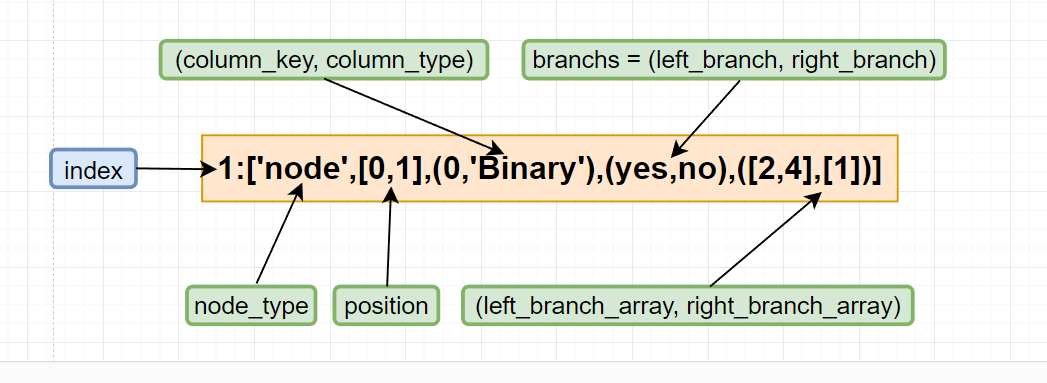

In [27]:

def predict(X,tree,verbose = False):


  predictions_list = []
  for n in range(len(X)):


    the_element_to_be_predict = X[n]
    index = 0
    stay_while = True

    if verbose == True:
      print()
      print('the_element_to_be_predict number:',n)
      print('the_element_to_be_predict number:',the_element_to_be_predict)


    while stay_while:

      if verbose == True:
        print()
        print('index',index)

      node_type = tree[index][0]
      position = tree[index][1]

      if node_type=='leaf':
        stay_while = False
        prediction_on_this_leaf = tree[index][2]
        predictions_list.append(prediction_on_this_leaf)

      elif node_type=='node':

        column_key = tree[index][2][0]
        column_type = tree[index][2][1]
        branchs = tree[index][3]
        left_branch = tree[index][3][0]
        right_branch = tree[index][3][1]
        left_branch_array = tree[index][4][0]
        right_branch_array = tree[index][4][1]
        new_branch = None
        new_position = None

        if column_type =='Binary':
          
          # select the condition eg: 0,1 or yes or no
          for i in range(len(branchs)):
            if the_element_to_be_predict[column_key] == branchs[i]:
              new_branch = branchs[i]
          # position to search
          new_position = position.copy()
          new_position.append(new_branch)
          
          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break

        elif column_type =='Ordinal':

          ordinal_branch = branchs
          ordinal_branch_left_symbol = ordinal_branch[0][0]
          ordinal_branch_right_symbol = ordinal_branch[1][0]
          ordinal_branch_number = ordinal_branch[0][1]

          # select the condition eg: 0,1 or yes or no
          if the_element_to_be_predict[column_key] <= ordinal_branch_number:
            new_branch = left_branch
          else:
            new_branch = right_branch

          # position to search
          new_position = position.copy()
          new_position.append(new_branch)          

          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break

          if verbose == True:
            print('ordinal_branch_number',ordinal_branch_number)

        elif (column_type =='Continuous') or (column_type =='Discrete'):
          
          continuous_branch = branchs
          continuous_branch_left_symbol = continuous_branch[0][0]
          continuous_branch_right_symbol = continuous_branch[1][0]
          continuous_branch_number = continuous_branch[0][1]

          # select the condition eg: 0,1 or yes or no
          if the_element_to_be_predict[column_key] <= continuous_branch_number:
            new_branch = left_branch
          else:
            new_branch = right_branch

          # position to search
          new_position = position.copy()
          new_position.append(new_branch)          

          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break

          if verbose == True:
            print('continuous_branch_number',continuous_branch_number)

        elif column_type =='Categorical':
          
          categorical_branch = branchs
          categorical_branch_left_symbol = categorical_branch[0][0]
          categorical_branch_right_symbol = categorical_branch[1][0]
          categorical_branch_string = categorical_branch[0][1]
     
          # select the condition eg: 0,1 or yes or no
          if the_element_to_be_predict[column_key] in categorical_branch_string:
            new_branch = left_branch
          else:
            new_branch = right_branch

          # position to search
          new_position = position.copy()
          new_position.append(new_branch)          

          # searching for a new key on dict tree
          for i in range(len(tree)):
            if tree[i][1] == new_position:
              index = i
              break
          if verbose == True:
            print('categorical_branch_string',categorical_branch_string)

        else:
          print('Error: column_type not found')
          
        if verbose == True:
          print('node_type',node_type)
          print('position' ,position)
          print('column_key' ,column_key)
          print('column_type' ,column_type)
          print('branchs' ,branchs)
          print('left_branch',left_branch) 
          print('right_branch' ,right_branch)
          print('left_branch_array',left_branch_array) 
          print('right_branch_array' ,right_branch_array)
          print('new_branch' ,new_branch)
          print('new_position' ,new_position)

  return predictions_list


# Predicting with small samples

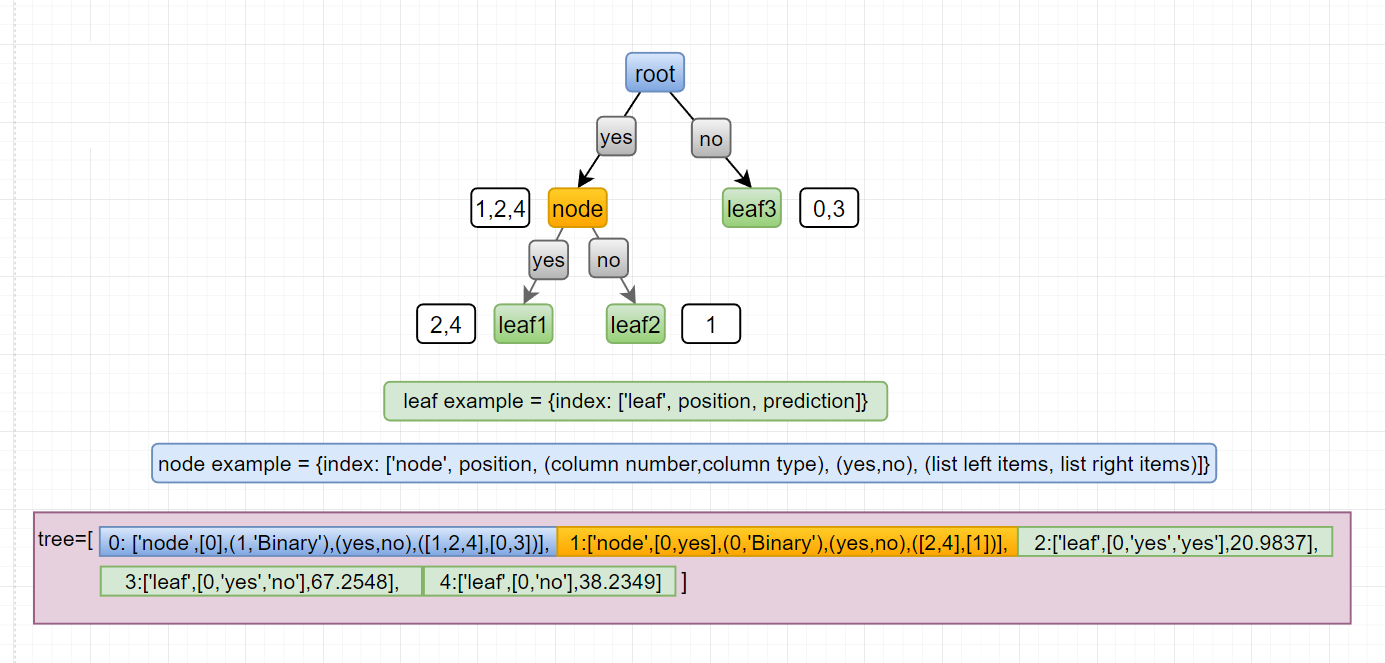

## Predict with: Binary, simple

In [28]:
data_dict = {'Binary':[1,1,0,0],'Dependent Variable': [5.66,10.88,0.44,1.624]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1]] 
y = predict(X,tree,verbose= True)
print('Prediction:', y)


0 ['node', [0], (0, 'Binary'), (1, 0), ([0, 1], [2, 3])]
1 ['leaf', [0, 1], 8.27]
2 ['leaf', [0, 0], 1.032]

the_element_to_be_predict number: 0
the_element_to_be_predict number: [1]

index 0
node_type node
position [0]
column_key 0
column_type Binary
branchs (1, 0)
left_branch 1
right_branch 0
left_branch_array [0, 1]
right_branch_array [2, 3]
new_branch 1
new_position [0, 1]

index 1
Prediction: [8.27]


## Predict with: Binary, bigger data to predict

In [29]:
data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1,1,1],[1,0,0],[1,0,1],[0,1,1],[0,0,0]] 
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (2, 'Binary'), (1, 0), ([0, 1, 3, 5, 8], [2, 4, 6, 7, 9])]
1 ['node', [0, 1], (1, 'Binary'), (1, 0), ([5], [0, 1, 3, 8])]
2 ['leaf', [0, 1, 1], 5.9]
3 ['node', [0, 1, 0], (0, 'Binary'), (1, 0), ([0], [1, 3, 8])]
4 ['leaf', [0, 1, 0, 1], 1.22]
5 ['leaf', [0, 1, 0, 0], 3.0433333333333334]
6 ['node', [0, 0], (1, 'Binary'), (1, 0), ([2, 4, 9], [6, 7])]
7 ['leaf', [0, 0, 1], 3.108]
8 ['leaf', [0, 0, 0], 8.27]
Prediction: [5.9, 8.27, 1.22, 5.9, 8.27]


## Predict with: Binary, bigger data to input

In [30]:
data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1,1,1]] 
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (2, 'Binary'), (1, 0), ([0, 1, 3, 5, 8], [2, 4, 6, 7, 9])]
1 ['node', [0, 1], (1, 'Binary'), (1, 0), ([5], [0, 1, 3, 8])]
2 ['leaf', [0, 1, 1], 5.9]
3 ['node', [0, 1, 0], (0, 'Binary'), (1, 0), ([0], [1, 3, 8])]
4 ['leaf', [0, 1, 0, 1], 1.22]
5 ['leaf', [0, 1, 0, 0], 3.0433333333333334]
6 ['node', [0, 0], (1, 'Binary'), (1, 0), ([2, 4, 9], [6, 7])]
7 ['leaf', [0, 0, 1], 3.108]
8 ['leaf', [0, 0, 0], 8.27]
Prediction: [5.9]


In [31]:
import random
random.seed(0)
randomlist = []
for x in range(11):
  temp_list =[]
  for i in range(0,100):
    n = random.randint(0,1)
    temp_list.append(n)
  randomlist.append(temp_list)

randomlist1 = []
temp_list1 =[]
for i in range(0,100):
  n = random.random()
  temp_list1.append(n)
randomlist1.append(temp_list1)

data_dict =  {'Binary':randomlist[0],'Binary2':randomlist[1],'Binary3':randomlist[2],'Binary4':randomlist[3],'Binary5':randomlist[4],'Binary6':randomlist[5],'Dependent Variable':randomlist1[0]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [randomlist[7],randomlist[8],randomlist[9],randomlist[10]] 
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (3, 'Binary'), (1, 0), ([4, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 27, 28, 29, 36, 37, 38, 41, 43, 44, 45, 46, 47, 48, 52, 53, 54, 57, 59, 60, 61, 69, 71, 72, 75, 76, 77, 81, 83, 84, 85, 86, 91, 92, 93, 95, 96, 97, 98, 99], [0, 1, 2, 3, 5, 6, 11, 13, 15, 17, 19, 21, 22, 23, 25, 26, 30, 31, 32, 33, 34, 35, 39, 40, 42, 49, 50, 51, 55, 56, 58, 62, 63, 64, 65, 66, 67, 68, 70, 73, 74, 78, 79, 80, 82, 87, 88, 89, 90, 94])]
1 ['node', [0, 1], (4, 'Binary'), (1, 0), ([9, 10, 12, 16, 18, 20, 28, 36, 37, 41, 46, 47, 48, 61, 69, 72, 75, 76, 77, 81, 83, 86, 93], [4, 7, 8, 14, 24, 27, 29, 38, 43, 44, 45, 52, 53, 54, 57, 59, 60, 71, 84, 85, 91, 92, 95, 96, 97, 98, 99])]
2 ['node', [0, 1, 1], (0, 'Binary'), (1, 0), ([16, 20, 28, 37, 46, 47, 77, 81, 83, 86, 93], [9, 10, 12, 18, 36, 41, 48, 61, 69, 72, 75, 76])]
3 ['node', [0, 1, 1, 1], (1, 'Binary'), (1, 0), ([16, 20, 28, 37, 47, 81, 93], [46, 77, 83, 86])]
4 ['node', [0, 1, 1, 1, 1], (5, 'Binary'), (1, 0), ([16, 20, 93], [28, 37, 47, 81

## Predict with: Binary, string

In [32]:
data_dict = {'Binary':['yes','no','no','no','yes','yes','yes','no','no','yes'],'Binary2':['no','no','yes','no','yes','yes','no','no','no','yes'],
             'Binary3':['yes','yes','no','yes','no','yes','no','no','yes','no'],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}
data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [['yes','yes','yes'],['yes','yes','yes']]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (2, 'Binary'), ('yes', 'no'), ([0, 1, 3, 5, 8], [2, 4, 6, 7, 9])]
1 ['node', [0, 'yes'], (1, 'Binary'), ('yes', 'no'), ([5], [0, 1, 3, 8])]
2 ['leaf', [0, 'yes', 'yes'], 5.9]
3 ['node', [0, 'yes', 'no'], (0, 'Binary'), ('yes', 'no'), ([0], [1, 3, 8])]
4 ['leaf', [0, 'yes', 'no', 'yes'], 1.22]
5 ['leaf', [0, 'yes', 'no', 'no'], 3.0433333333333334]
6 ['node', [0, 'no'], (1, 'Binary'), ('yes', 'no'), ([2, 4, 9], [6, 7])]
7 ['leaf', [0, 'no', 'yes'], 3.108]
8 ['leaf', [0, 'no', 'no'], 8.27]
Prediction: [5.9, 5.9]


## Predict with: Ordinal

In [33]:

data_dict = {'Ordinal':[3,4,1,2,2,2,3,4,3,1],'Ordinal1':[4,4,1,2,2,2,3,4,3,1],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)

X= [[2,3,'a']]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (0, 'Ordinal'), (['<=', 1], ['>', 1]), ([2, 9], [0, 1, 3, 4, 5, 6, 7, 8])]
1 ['leaf', [0, ['<=', 1]], 1.2120000000000002]
2 ['node', [0, ['>', 1]], (0, 'Ordinal'), (['<=', 2], ['>', 2]), ([3, 4, 5], [0, 1, 6, 7, 8])]
3 ['leaf', [0, ['>', 1], ['<=', 2]], 6.5]
4 ['node', [0, ['>', 1], ['>', 2]], (0, 'Ordinal'), (['<=', 3], ['>', 3]), ([0, 6, 8], [1, 7])]
5 ['leaf', [0, ['>', 1], ['>', 2], ['<=', 3]], 2.44]
6 ['leaf', [0, ['>', 1], ['>', 2], ['>', 3]], 6.4350000000000005]
Prediction: [6.5]


## Predict with: Discrete

In [34]:
data_dict = {'Discrete':[-3,6,5,-5,0,4,5,1,3,3],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[2]]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (0, 'Discrete'), (['<=', 2.0], ['>', 2.0]), ([0, 3, 4, 7], [1, 2, 5, 6, 8, 9])]
1 ['node', [0, ['<=', 2.0]], (0, 'Discrete'), (['<=', 0.5], ['>', 0.5]), ([0, 3, 4], [7])]
2 ['leaf', [0, ['<=', 2.0], ['<=', 0.5]], 4.94]
3 ['leaf', [0, ['<=', 2.0], ['>', 0.5]], 10.88]
4 ['node', [0, ['>', 2.0]], (0, 'Discrete'), (['<=', 3.5], ['>', 3.5]), ([8, 9], [1, 2, 5, 6])]
5 ['leaf', [0, ['>', 2.0], ['<=', 3.5]], 1.032]
6 ['node', [0, ['>', 2.0], ['>', 3.5]], (0, 'Discrete'), (['<=', 4.5], ['>', 4.5]), ([5], [1, 2, 6])]
7 ['leaf', [0, ['>', 2.0], ['>', 3.5], ['<=', 4.5]], 5.9]
8 ['leaf', [0, ['>', 2.0], ['>', 3.5], ['>', 4.5]], 2.816666666666667]
Prediction: [10.88]


## Predict with: Categorical

In [35]:
data_dict = {'Categorical ':['a','b','c','d','d','a','a','c','b','b'],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [['a']]
y = predict(X,tree,verbose= False)
print('Prediction:', y)

0 ['node', [0], (0, 'Categorical'), (['in', ('b',)], ['not in', ('b',)]), ([1, 8, 9], [0, 2, 3, 4, 5, 6, 7])]
1 ['leaf', [0, ['in', ('b',)]], 1.3513333333333333]
2 ['node', [0, ['not in', ('b',)]], (0, 'Categorical'), (['in', ('a',)], ['not in', ('a',)]), ([0, 5, 6], [2, 3, 4, 7])]
3 ['leaf', [0, ['not in', ('b',)], ['in', ('a',)]], 4.26]
4 ['node', [0, ['not in', ('b',)], ['not in', ('a',)]], (0, 'Categorical'), (['in', ('c',)], ['not in', ('c',)]), ([2, 7], [3, 4])]
5 ['leaf', [0, ['not in', ('b',)], ['not in', ('a',)], ['in', ('c',)]], 5.840000000000001]
6 ['leaf', [0, ['not in', ('b',)], ['not in', ('a',)], ['not in', ('c',)]], 6.800000000000001]
Prediction: [4.26]


## Predict with: Continuous

In [36]:

data_dict = {'Continuous ':[1,-0.344,0.11,0.77,1.23,-1.111,1.785,0.2346,0.111,1.999],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[0.5]]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (0, 'Continuous'), (['<=', 0.1728], ['>', 0.1728]), ([1, 2, 5, 8], [0, 3, 4, 6, 7, 9])]
1 ['node', [0, ['<=', 0.1728]], (0, 'Continuous'), (['<=', -0.7275], ['>', -0.7275]), ([5], [1, 2, 8])]
2 ['leaf', [0, ['<=', 0.1728], ['<=', -0.7275]], 5.9]
3 ['leaf', [0, ['<=', 0.1728], ['>', -0.7275]], 1.0766666666666667]
4 ['node', [0, ['>', 0.1728]], (0, 'Continuous'), (['<=', 0.5023], ['>', 0.5023]), ([7], [0, 3, 4, 6, 9])]
5 ['leaf', [0, ['>', 0.1728], ['<=', 0.5023]], 10.88]
6 ['node', [0, ['>', 0.1728], ['>', 0.5023]], (0, 'Continuous'), (['<=', 1.892], ['>', 1.892]), ([0, 3, 4, 6], [9])]
7 ['node', [0, ['>', 0.1728], ['>', 0.5023], ['<=', 1.892]], (0, 'Continuous'), (['<=', 1.115], ['>', 1.115]), ([0, 3], [4, 6])]
8 ['leaf', [0, ['>', 0.1728], ['>', 0.5023], ['<=', 1.892], ['<=', 1.115]], 3.96]
9 ['leaf', [0, ['>', 0.1728], ['>', 0.5023], ['<=', 1.892], ['>', 1.115]], 6.28]
10 ['leaf', [0, ['>', 0.1728], ['>', 0.5023], ['>', 1.892]], 1.624]
Prediction: [10.88]


##Predict with: Binary and Ordinal, Discrete, Categorical and Continuous




In [37]:

data_dict = {'Binary':[1,0,0,0,1,1,1,0,0,1],'Binary2':[0,0,1,0,1,1,0,0,0,1],'Binary3':[1,1,0,1,0,1,0,0,1,0],'Ordinal':[10,11,12,13,14,11,11,12,14,10],'Discrete':[-3,6,5,-5,0,4,5,1,3,3],'Categorical':['a','b','c','d','d','a','a','c','b','b'],
             'Continuous':[1,-0.344,0.11,0.77,1.23,-1.111,1.785,0.2346,0.111,1.999],'Dependent Variable': [1.22,1.99,0.8,6.7,6.9,5.9,5.66,10.88,0.44,1.624]}

data_raw = pd.DataFrame(data_dict)
X = data_raw.iloc[:,:-1].values
y = data_raw.iloc[:,-1].values
tree = DecisionTreeClassification(X,y)

for k,v in tree.items():
  print(k,v)
  
X= [[1,0,1,11,3,'a',0.3]]
y = predict(X,tree,verbose= False)
print('Prediction:', y)


0 ['node', [0], (5, 'Categorical'), (['in', ('b',)], ['not in', ('b',)]), ([1, 8, 9], [0, 2, 3, 4, 5, 6, 7])]
1 ['leaf', [0, ['in', ('b',)]], 1.3513333333333333]
2 ['node', [0, ['not in', ('b',)]], (3, 'Ordinal'), (['<=', 10], ['>', 10]), ([0], [2, 3, 4, 5, 6, 7])]
3 ['leaf', [0, ['not in', ('b',)], ['<=', 10]], 1.22]
4 ['node', [0, ['not in', ('b',)], ['>', 10]], (4, 'Discrete'), (['<=', 4.5], ['>', 4.5]), ([3, 4, 5, 7], [2, 6])]
5 ['node', [0, ['not in', ('b',)], ['>', 10], ['<=', 4.5]], (5, 'Categorical'), (['in', ('c',)], ['not in', ('c',)]), ([7], [3, 4, 5])]
6 ['leaf', [0, ['not in', ('b',)], ['>', 10], ['<=', 4.5], ['in', ('c',)]], 10.88]
7 ['leaf', [0, ['not in', ('b',)], ['>', 10], ['<=', 4.5], ['not in', ('c',)]], 6.5]
8 ['leaf', [0, ['not in', ('b',)], ['>', 10], ['>', 4.5]], 3.23]
Prediction: [6.5]


# Predicting with Titanic data

Data

In [38]:
data_raw=pd.read_csv('/content/data_num.csv',index_col=0)
data = data_raw.copy()
data.dropna(inplace=True)
X = data.drop(["Age","Name","Survived"],axis=1).values
y = data.iloc[:, 0].values

Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Scalling is not needed in Decision Tree

Model

In [40]:
tree = DecisionTreeClassification(X_train,y_train,max_depth= 6,min_sample = 60)

Tree

In [41]:
for k,v in tree.items():
  print(k,v)
  

0 ['node', [0], (12, 'Binary'), (1.0, 0.0), ([45, 87, 90, 104, 123, 143, 145, 172, 196, 199, 200, 212, 235, 237, 308, 312, 321, 326, 340, 346, 357, 378, 397, 444, 461, 479, 523, 538, 545], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

Single prediction

In [42]:
person= [[3,0,0,512.3292,0,1,0,0,1,0,0,0,0,0]]
y = predict(person,tree,verbose= False)
print('Prediction:', y)

Prediction: [45.5]


Full prediction

In [43]:
prediction = predict(X_test,tree,verbose= False)
prediction

[33.333333333333336,
 31.944444444444443,
 4.9079310344827585,
 33.453125,
 47.78888888888889,
 28.163888888888888,
 33.453125,
 38.40677966101695,
 47.78888888888889,
 38.40677966101695,
 28.163888888888888,
 22.0,
 12.090909090909092,
 28.163888888888888,
 33.453125,
 33.333333333333336,
 33.453125,
 12.090909090909092,
 33.333333333333336,
 33.453125,
 28.163888888888888,
 31.944444444444443,
 33.333333333333336,
 28.163888888888888,
 28.163888888888888,
 12.090909090909092,
 31.944444444444443,
 24.0,
 38.40677966101695,
 33.333333333333336,
 28.163888888888888,
 4.9079310344827585,
 28.163888888888888,
 38.40677966101695,
 28.163888888888888,
 28.163888888888888,
 38.40677966101695,
 47.78888888888889,
 28.163888888888888,
 33.333333333333336,
 28.163888888888888,
 28.163888888888888,
 38.40677966101695,
 38.40677966101695,
 28.163888888888888,
 22.0,
 4.9079310344827585,
 24.0,
 28.163888888888888,
 28.163888888888888,
 47.78888888888889,
 31.944444444444443,
 33.453125,
 31.9444

Confusion Matrix

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.4090083801574623